# IBM Data Science Specialization Project
## COVID 19 Federal District Data Analysis

### Installing and Importing the required Libraries

In [1]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from folium.plugins import HeatMap

! pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

! pip install plotly==4.8.2

# Habilita modo offline
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# Definindo o renderizador:
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

import plotly.express as px

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 122kB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 6.8MB/s eta 0:00:01     |██████                          | 1.0MB 6.8MB/s eta 0:00:01     |██████████████████████████▌     | 4.6MB 6.8MB/s eta 0:00:01
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         394 KB

The f

Folium installed
Libraries imported.


## I. Import DataSet from GDF Website, Wikipedia and GitHub

### GDF COVID 19 Data

##### The database used is taken directly from the COVID 19 information center organized by the Government of the Federal District. Also, the dataset is updated daily and the code was made in a way that allows all values to be updated automatically each time the code is run.

In [67]:
import pandas as pd

url = "https://covid19.ssp.df.gov.br/resources/dados/dados-abertos.csv?param=[random]"
df = pd.read_csv(url, sep = ';')
df.columns = ['Id', 'Data', 'Date','Sex', 'Age', 'RA','UF', 'Condition', 'Pneumopatia','Nefropatia','Doença Hematológica','Distúrbios Metabólicos','Imunopressão','Obesidade','Outros','Cardiovasculopatia']
df.head()



,Id,Data,Date,Sex,Age,RA,UF,Condition,Pneumopatia,Nefropatia,Doença Hematológica,Distúrbios Metabólicos,Imunopressão,Obesidade,Outros,Cardiovasculopatia
0,1,02/07/2020,18/03/2020,Masculino,50 a 59 anos,Plano Piloto,DISTRITO FEDERAL,Recuperado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,02/07/2020,18/03/2020,Masculino,50 a 59 anos,Lago Sul,DISTRITO FEDERAL,Recuperado,Sim,Não,Não,Sim,Não,Não,Não,Não
2,3,02/07/2020,18/03/2020,Masculino,40 a 49 anos,Lago Sul,DISTRITO FEDERAL,Recuperado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,02/07/2020,18/03/2020,Masculino,>= 60 anos,Águas Claras,DISTRITO FEDERAL,Recuperado,Não,Não,Não,Sim,Não,Não,Não,Sim
4,8,02/07/2020,18/03/2020,Feminino,20 a 29 anos,Plano Piloto,DISTRITO FEDERAL,Recuperado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,Id
count,51123.000000
mean,29135.958218
std,17982.034673
min,1.000000
25%,13583.500000
50%,27191.000000
75%,44936.500000
max,61601.000000


### Federal District Population Data

#### The database was extracted directly from Wikipedia. However, the database was out of date and manual intervention was necessary to add two newly formed Administrative Regions (Arniqueiras and Sol Nascente)

In [68]:
pop_data = "https://raw.githubusercontent.com/mathewspaes/COVID-19-Federal-District-Data-Analysis/master/Population-DF.csv"
pop = pd.read_csv(pop_data)
pop = pop.drop(columns= ['Posição'])
pop.columns = ["RA", "Population"]
pop['Population'] = pop['Population'].astype(float)
pop.head()

,RA,Population
0,Ceilândia,398285.0
1,Samambaia,254439.0
2,Taguatinga,222598.0
3,Plano Piloto,220393.0
4,Planaltina,189421.0


In [5]:
pop.describe

<bound method NDFrame.describe of                     RA  Population
0            Ceilândia    398285.0
1            Samambaia    254439.0
2           Taguatinga    222598.0
3         Plano Piloto    220393.0
4           Planaltina    189421.0
5         Águas Claras    148940.0
6     Recanto das Emas    145304.0
7                 Gama    141911.0
8                Guará    132685.0
9          Santa Maria    125123.0
10       Sobradinho II    100775.0
11       São Sebastião    100161.0
12        Sol Nascente     91066.0
13       Vicente Pires     72879.0
14              Itapoã     68587.0
15          Sobradinho     68551.0
16  Sudoeste/Octogonal     53262.0
17          Brazlândia     52287.0
18     Riacho Fundo II     51709.0
19             Paranoá     48020.0
20         Arniqueiras     45851.0
21        Riacho Fundo     40098.0
22                SCIA     39015.0
23          Lago Norte     37455.0
24            Cruzeiro     33539.0
25            Lago Sul     29346.0
26     Jardim Botânic

## II. Data Preprocessing and Cleaning

### GDF COVID 19 Data Cleaning and Processing

In [69]:
federal_district = df.drop(columns= ['Data','Pneumopatia','Nefropatia','Doença Hematológica','Distúrbios Metabólicos','Imunopressão','Obesidade','Outros','Cardiovasculopatia'])
federal_district['Date'] = pd.to_datetime(federal_district['Date'], format='%d/%m/%Y')
federal_district

,Id,Date,Sex,Age,RA,UF,Condition
0,1,2020-03-18,Masculino,50 a 59 anos,Plano Piloto,DISTRITO FEDERAL,Recuperado
1,2,2020-03-18,Masculino,50 a 59 anos,Lago Sul,DISTRITO FEDERAL,Recuperado
2,3,2020-03-18,Masculino,40 a 49 anos,Lago Sul,DISTRITO FEDERAL,Recuperado
3,6,2020-03-18,Masculino,>= 60 anos,Águas Claras,DISTRITO FEDERAL,Recuperado
4,8,2020-03-18,Feminino,20 a 29 anos,Plano Piloto,DISTRITO FEDERAL,Recuperado
...,...,...,...,...,...,...,...
51118,61597,2020-07-02,Feminino,<= 19 anos,Planaltina,DISTRITO FEDERAL,Não Informado
51119,61598,2020-07-02,Feminino,>= 60 anos,Sobradinho II,DISTRITO FEDERAL,Não Informado
51120,61599,2020-07-02,Masculino,40 a 49 anos,Taguatinga,DISTRITO FEDERAL,Não Informado
51121,61600,2020-07-02,Feminino,<= 19 anos,Taguatinga,DISTRITO FEDERAL,Não Informado


#### As the analysis made is restricted to Administrative Regions, a filter was made for the cases of COVID 19 that removed the cases of patients from "Other States" and patients where it was not possible to identify these data and were listed as "Not Informed"

In [70]:
federal_district = federal_district[federal_district.RA != 'Não Informado']
federal_district = federal_district[federal_district.RA != 'Outros Estados']

federal_district.tail()

,Id,Date,Sex,Age,RA,UF,Condition
51118,61597,2020-07-02,Feminino,<= 19 anos,Planaltina,DISTRITO FEDERAL,Não Informado
51119,61598,2020-07-02,Feminino,>= 60 anos,Sobradinho II,DISTRITO FEDERAL,Não Informado
51120,61599,2020-07-02,Masculino,40 a 49 anos,Taguatinga,DISTRITO FEDERAL,Não Informado
51121,61600,2020-07-02,Feminino,<= 19 anos,Taguatinga,DISTRITO FEDERAL,Não Informado
51122,61601,2020-07-02,Feminino,<= 19 anos,Planaltina,DISTRITO FEDERAL,Não Informado


In [11]:
federal_district.describe

<bound method NDFrame.describe of           Id       Date        Sex           Age            RA  \
0          1 2020-03-18  Masculino  50 a 59 anos  Plano Piloto   
1          2 2020-03-18  Masculino  50 a 59 anos      Lago Sul   
2          3 2020-03-18  Masculino  40 a 49 anos      Lago Sul   
3          6 2020-03-18  Masculino    >= 60 anos  Águas Claras   
4          8 2020-03-18   Feminino  20 a 29 anos  Plano Piloto   
...      ...        ...        ...           ...           ...   
49279  59468 2020-07-01   Feminino  20 a 29 anos  Águas Claras   
49281  59470 2020-07-01  Masculino  50 a 59 anos   Santa Maria   
49284  59473 2020-07-01  Masculino  30 a 39 anos  Riacho Fundo   
49287  59476 2020-07-01   Feminino  30 a 39 anos     Ceilândia   
49288  59477 2020-07-01   Feminino    >= 60 anos     Ceilândia   

                     UF      Condition  
0      DISTRITO FEDERAL     Recuperado  
1      DISTRITO FEDERAL     Recuperado  
2      DISTRITO FEDERAL     Recuperado  
3      DI

## III. Analysing Categories

#### In this segment, the data were analyzed according to each category of the dataset. Namely as:

1. Cases Timeline
2. Age
3. Sex
4. Administrative Region (in Portuguese - RA)
5. Health Condition.

### 1. Cases Timelines

#### Aggregating COVID 19 case values per day. 

Plotting a graph of evolution of the number of cases of COVID 19 PER DAY, since 01/03/2020 (dd:mm:yyyy)

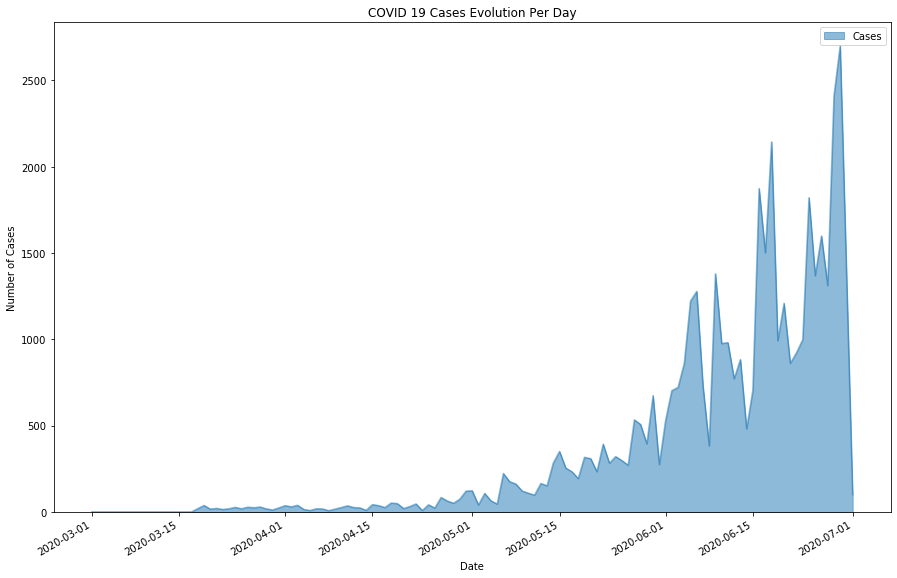

In [12]:
cases_perday =  federal_district.groupby('Date')['Id'].count().to_frame().astype(float)
cases_perday.rename(columns={'Id': 'Cases'}, inplace=True)

cases_perday .plot(kind='area', 
             stacked=False,
             figsize=(15, 10), # pass a tuple (x, y) size
             )

plt.title('COVID 19 Cases Evolution Per Day')
plt.ylabel('Number of Cases')
plt.xlabel('Date')

plt.show()

#### Graph of evolution of the number of cases of COVID 19 PER DAY in the last 45 days. Approximately, the time when quarantine and social isolation measures began to relax.

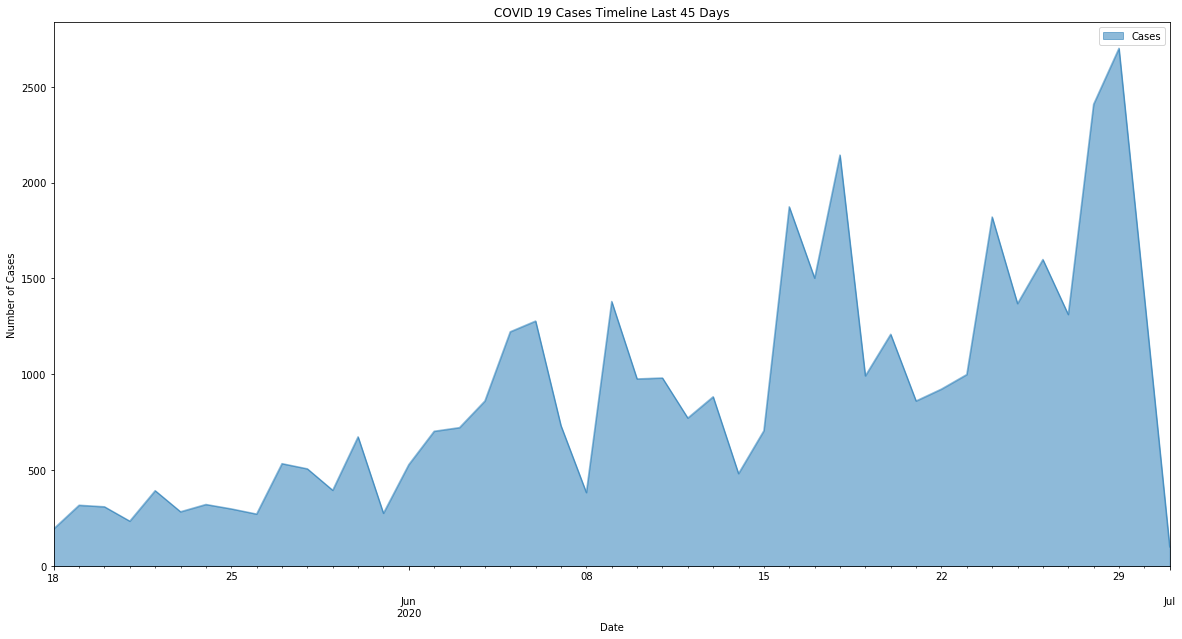

In [16]:
cases_perday.tail(45).plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('COVID 19 Cases Timeline Last 45 Days')
plt.ylabel('Number of Cases')
plt.xlabel('Date')

plt.show()

### Timeline of COVID 19 cases over time

In [14]:
timeline = federal_district.groupby(['Date', 'Condition'])['Id'].count().reset_index()
timeline['Condition'] = timeline['Condition'].replace(['Leve', 'Moderado', 'Grave', 'Não Informado', 'Óbito', 'Recuperado', 'Ativo'], 'COVID19')
timeline.columns = ['Date', 'Status', 'Number of Cases']
timeline['Total'] = timeline.groupby(['Status']).cumsum()

fig = px.area(timeline, 
              x="Date", 
              y="Total", 
              color='Status', 
              height=600,
              title='COVID 19 Cases Over Time',
              color_discrete_sequence = ['royalblue'])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

#### Graph of evolution of the number of deaths of COVID 19 per day

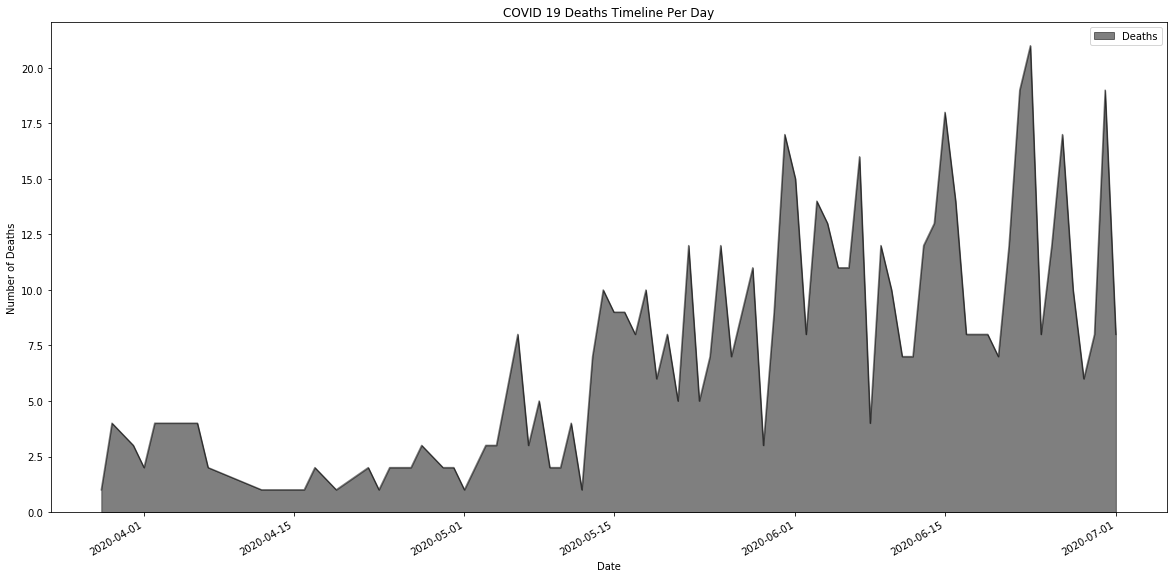

In [15]:
obitos_perday = federal_district[federal_district['Condition'] == 'Óbito']
obitos_perday = obitos_perday.groupby('Date')['Id'].count().to_frame().astype(float)
obitos_perday.rename(columns={'Id': 'Deaths'}, inplace=True)
obitos_perday

obitos_perday.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             color = 'black')

plt.title('COVID 19 Deaths Timeline Per Day')
plt.ylabel('Number of Deaths')
plt.xlabel('Date')

plt.show()

### Timeline of COVID 19 deaths over time


In [17]:
obitos_timeline = federal_district[federal_district['Condition'] == 'Óbito']
obitos_timeline = obitos_timeline.groupby(['Date', 'Condition'])['Id'].count().reset_index()
obitos_timeline.columns = ['Date', 'Condition', 'Number of Deaths']
obitos_timeline['Total Deaths'] = obitos_timeline.groupby(['Condition']).cumsum()



fig = px.area(obitos_timeline, 
              x="Date", 
              y="Total Deaths", 
              color='Condition', 
              height=600,
              title='COVID 19 Deaths Over Time',
              color_discrete_sequence = ['black'])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()



### 2. Age

#### Distribution of the number of COVID 19 cases by age range



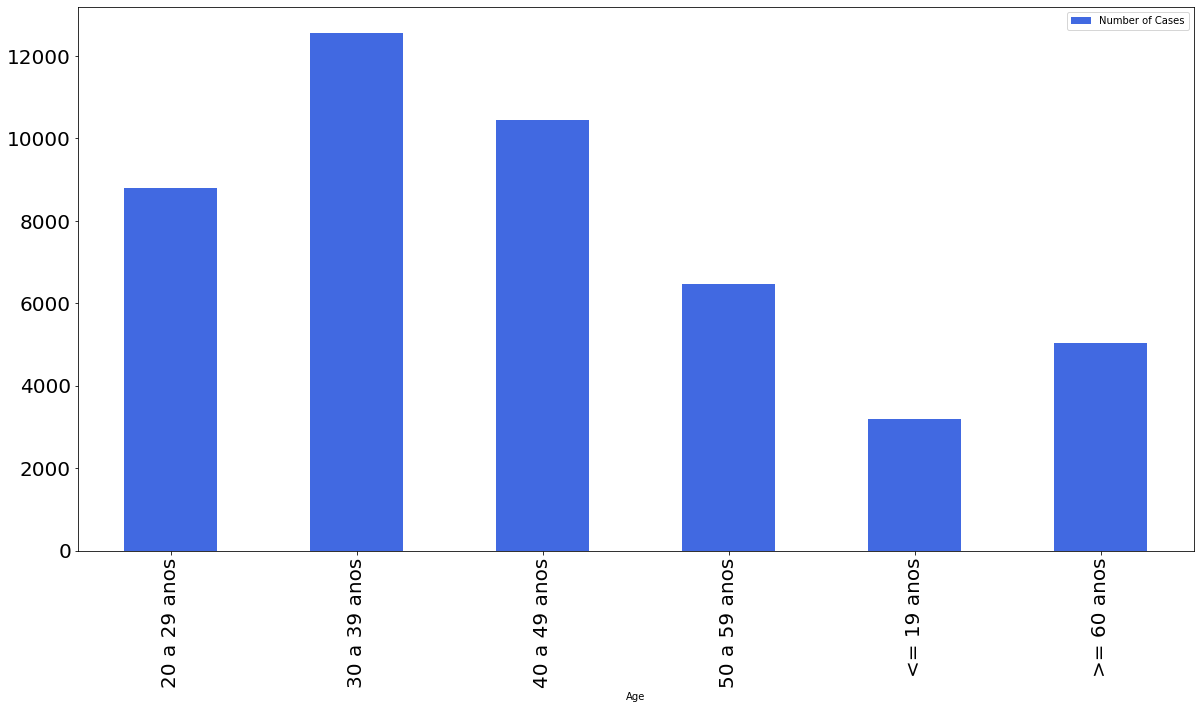

In [15]:
Age = federal_district.groupby('Age')['Age'].count().to_frame()
Age.rename(columns={'Age': 'Number of Cases'}, inplace=True)
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
Age.plot.bar(figsize=(20, 10), color = ('royalblue'))

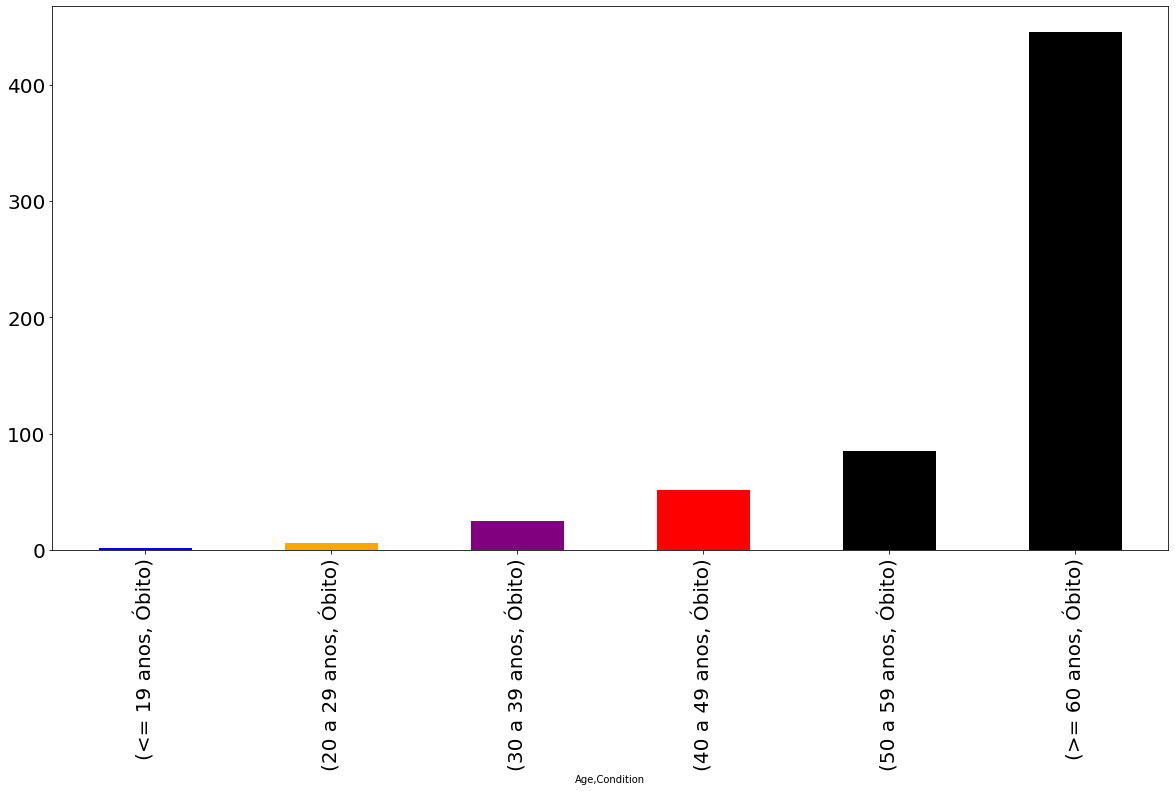

In [16]:
ageobitos = federal_district[federal_district['Condition'] == 'Óbito']
ageobitos.groupby(u'Age')['Condition'].value_counts().sort_values().plot.bar(align = 'center', color=['blue', 'orange', 'purple', 'red', 'black', 'black'], figsize=(20, 10))

### 3. RA

####  Distribution of the number of COVID 19 cases by RA

In [17]:
federal_district.groupby('RA')['RA'].count()

RA = federal_district.groupby('RA')['RA'].count().to_frame()
RA.rename(columns={'RA': 'Cases'}, inplace=True)
RA = RA.astype(float)
RA = RA.sort_values(by='Cases', ascending= False)
RA

,Cases
RA,
Ceilândia,6686.0
Plano Piloto,3601.0
Taguatinga,3549.0
Samambaia,3510.0
Entorno DF,2655.0
Gama,2462.0
Paranoá,1983.0
Guará,1905.0
Águas Claras,1777.0


#### Top 10 RA with the highest number of total cases

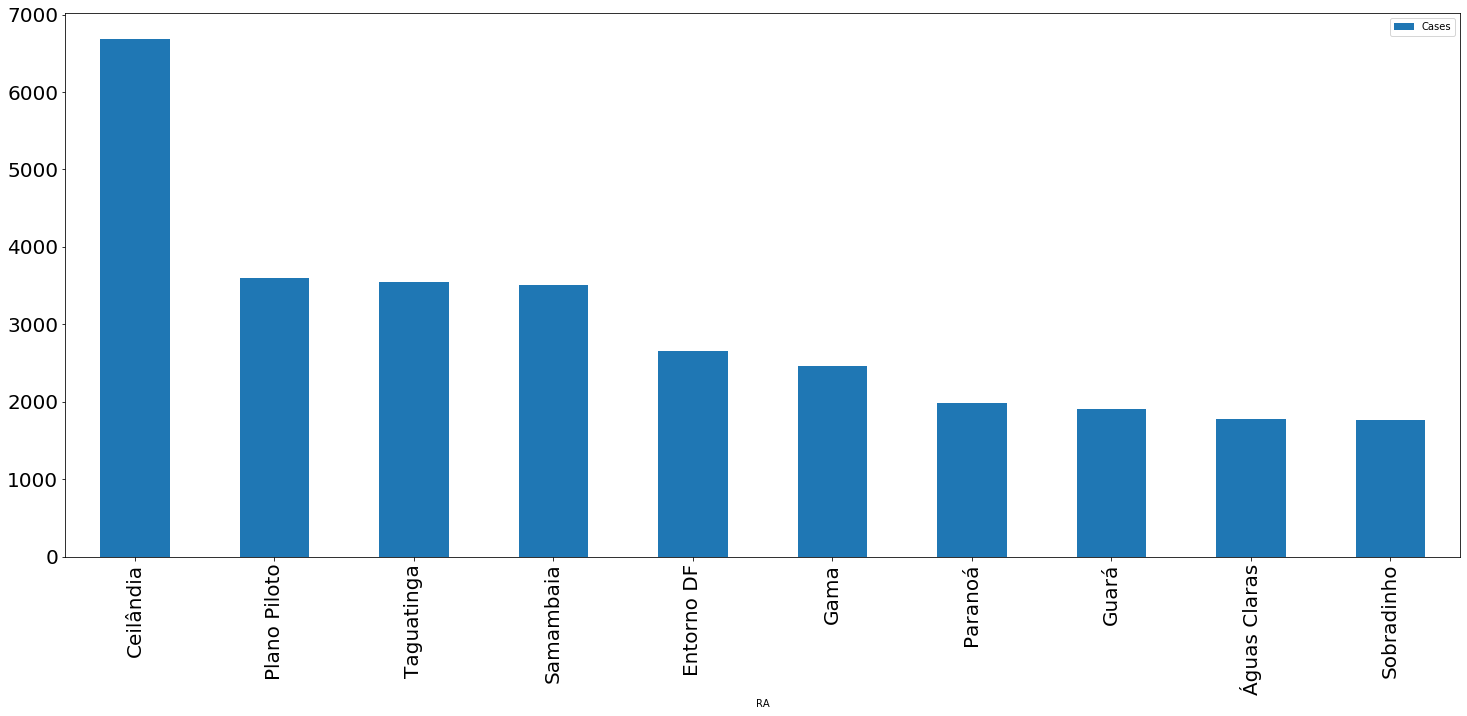

In [18]:
RA.head(10).plot.bar(align = 'center', figsize=(25,10))

#### RA list by total cases numbers

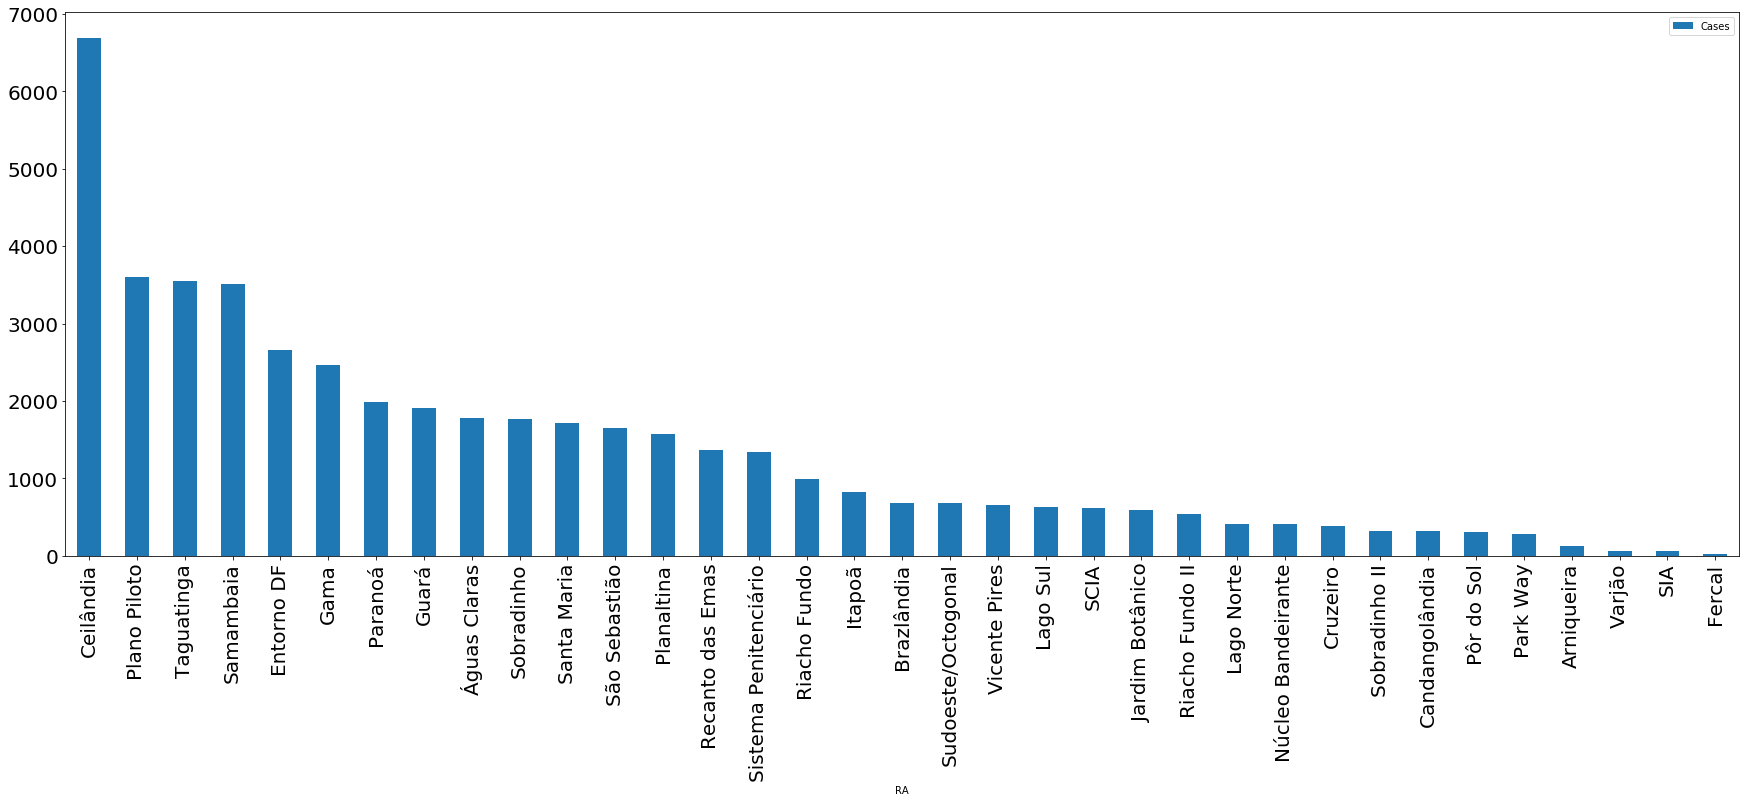

In [19]:
RA.plot.bar(figsize=(30,10))

#### Distribution of the number of COVID 19 deaths by RA

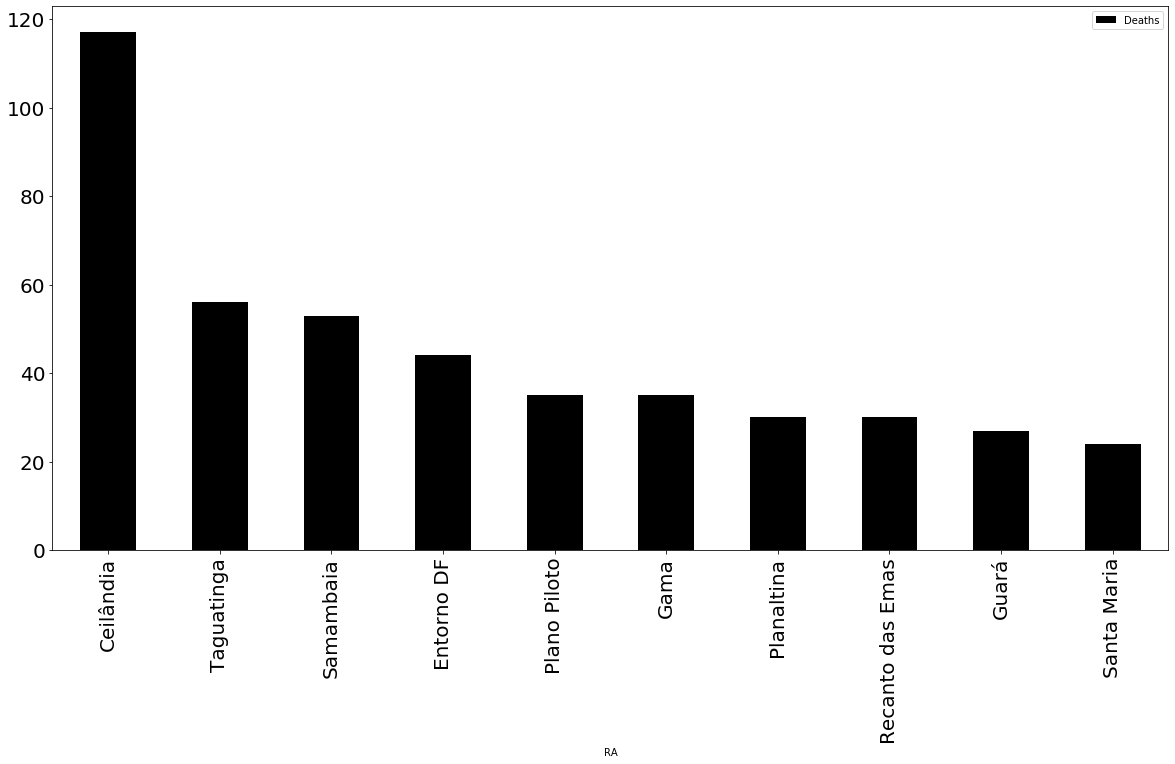

In [20]:
RA_O = federal_district[federal_district['Condition'] == 'Óbito']
RA_O = RA_O.groupby(u'RA')['Condition'].count().to_frame()
RA_O.rename(columns={'Condition': 'Deaths'}, inplace=True)
RA_O = RA_O.astype(float)
RA_O = RA_O.sort_values(by='Deaths', ascending= False)
RA_O.head(10).plot.bar(align = 'center', color = 'black', figsize=(20,10))

In [21]:
RA_pop = pd.merge(RA, pop, on = 'RA')
RA_pop.mean()

RA_pop['Percentage Population'] = ((RA_pop['Cases'] / RA_pop['Population'] )*100)
RA_pop

,RA,Cases,Population,Percentage Population
0,Ceilândia,6686.0,398285.0,1.678697
1,Plano Piloto,3601.0,220393.0,1.633899
2,Taguatinga,3549.0,222598.0,1.594354
3,Samambaia,3510.0,254439.0,1.379506
4,Gama,2462.0,141911.0,1.734890
5,Paranoá,1983.0,48020.0,4.129529
6,Guará,1905.0,132685.0,1.435731
7,Águas Claras,1777.0,148940.0,1.193098
8,Sobradinho,1766.0,68551.0,2.576184
9,Santa Maria,1711.0,125123.0,1.367454


### 4. Gender

#### Analyzing the distribution of the number of cases and deaths of COVID 19 by gender.

In [22]:
Sex =  federal_district.groupby('Sex')['Sex'].count().to_frame()
Sex.rename(columns={'Sex': 'value_counts'}, inplace=True)
Sex = Sex.astype(float)
Sex

,value_counts
Sex,
Feminino,24185.0
Masculino,22321.0


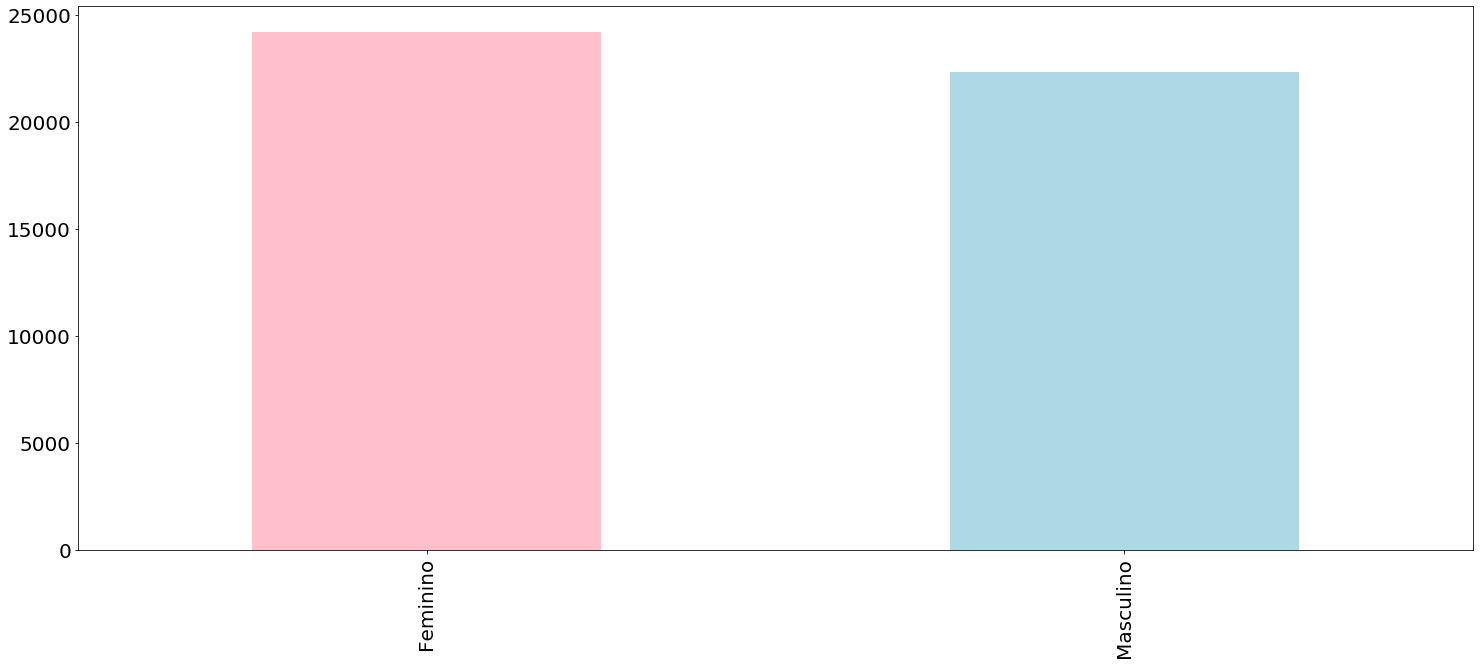

In [23]:
federal_district['Sex'].value_counts().plot.bar(align = 'center', color=['pink', 'lightblue'], figsize=(25,10))

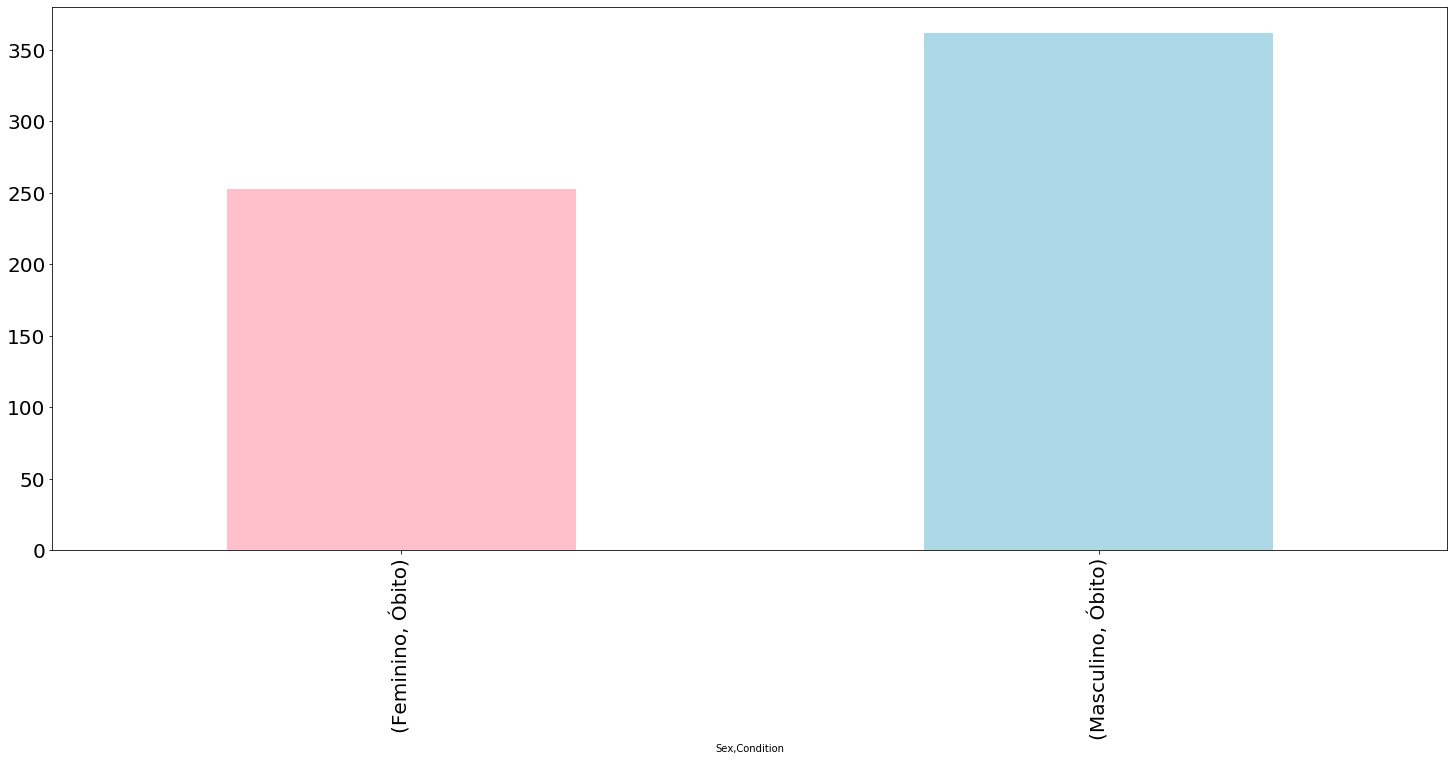

In [24]:
sex_obitos = federal_district[federal_district['Condition'] == 'Óbito']
sex_obitos.groupby(u'Sex')['Condition'].value_counts().plot.bar(align = 'center', color=['pink', 'lightblue'], figsize=(25,10))

### 5. Health Condition

In [71]:
Condition =  federal_district.groupby('Condition')['Condition'].count().to_frame()
Condition.rename(columns={'Condition': 'Number of Cases'}, inplace=True)
Condition = Condition.astype(float)
Condition

,Number of Cases
Condition,
Grave,29.0
Leve,12.0
Moderado,74.0
Não Informado,9715.0
Recuperado,36061.0
Óbito,615.0


In [60]:
federal_district['Condition'] = federal_district['Condition'].replace(['Leve', 'Moderado', 'Grave', 'Não Informado', ''], 'Ativo')
cond = federal_district.groupby('Condition')['Date'].count().to_frame()
cond.rename(columns={'Date': 'Number of Cases'}, inplace=True)
cond = cond.sort_values(by='Number of Cases', ascending= False)
cond

,Number of Cases
Condition,
Recuperado,38858
Ativo,11593
Óbito,623


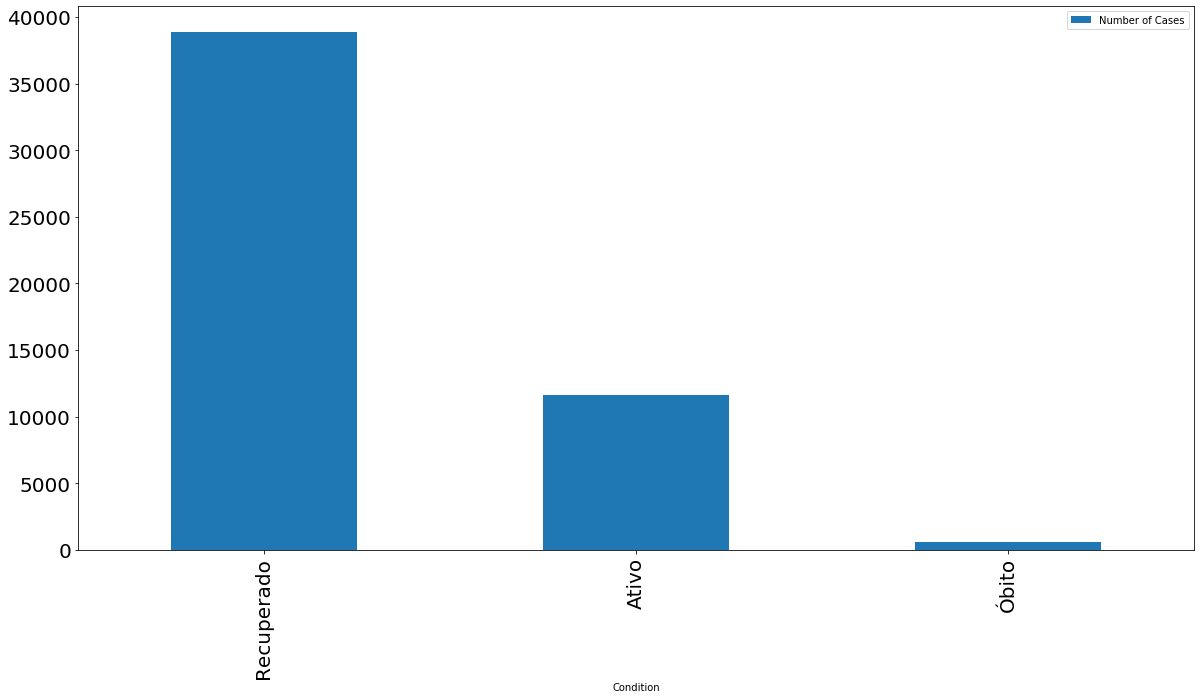

In [61]:
cond = cond.sort_values(by='Number of Cases', ascending= False)
cond.plot.bar(align = 'center',figsize=(20,10))

#### Aggregating COVID 19 case status values over time

In [62]:
df_agrupado = federal_district.groupby(['Date', 'Condition'])['Id'].count().reset_index()
df_agrupado['Condition'] = df_agrupado['Condition'].replace(['Leve', 'Moderado', 'Grave', 'Não Informado'], 'Ativo')
df_agrupado.columns = ['Date', 'Condition', 'Number of Cases']
df_agrupado['Total Cases'] = df_agrupado.groupby(['Condition']).cumsum()
df_agrupado

# Cores
recuperado = '#21bf73'
obito = '#fe9801'
ativo='#ff2e63'

fig = px.area(df_agrupado, 
              x="Date", 
              y="Total Cases", 
              color='Condition', 
              height=600,
              title='COVID Cases 19 Cases over time by health condition',
              color_discrete_sequence = [recuperado, ativo, 'black'])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

## IV. Building a Map Analysis

#### In this step we will build an exhibition using the map of the Federal District, the intention is to expose the territorial distribution of COVID 19 cases with regard to both the number of cases per administrative region and the number of deaths per administrative region.

#### Obtaining the latitude and longitude of the Administrative Regions

In [29]:
import pandas as pd

data1 = "https://raw.githubusercontent.com/mathewspaes/COVID-19-Federal-District-Data-Analysis/master/Lat%20-%20Long%20DF.csv"
lat_long = pd.read_csv(data1, sep = ';')
lat_long.columns = ['RA','Latitude', 'Longitude']

lat_long.head()

,RA,Latitude,Longitude
0,Arniqueira,-15.8515,-48.0063
1,Brazlândia,-15.6701,-48.2005
2,Candangolândia,-15.8495,-47.9502
3,Ceilândia,-15.8219,-48.1021
4,Cruzeiro,-15.7841,-47.9417


In [30]:
Data = lat_long[lat_long.RA != 'Entorno DF'] 
Data = Data[Data.RA != 'Sistema Penitenciário']
Data

,RA,Latitude,Longitude
0,Arniqueira,-15.8515,-48.0063
1,Brazlândia,-15.6701,-48.2005
2,Candangolândia,-15.8495,-47.9502
3,Ceilândia,-15.8219,-48.1021
4,Cruzeiro,-15.7841,-47.9417
6,Fercal,-15.6035,-47.8699
7,Gama,-16.0134,-48.0702
8,Guará,-15.8172,-47.9860
9,Itapoã,-15.7441,-47.7621
10,Jardim Botânico,-15.8539,-47.7953


#### Cleaning and Processing Data

In [31]:
RA_Data = pd.merge(RA, Data, on = 'RA')
RA_Data['Latitude'] = RA_Data['Latitude'].astype(float)
RA_Data['Longitude'] = RA_Data['Longitude'].astype(float)
RA_Data['Cases'] = RA_Data['Cases'].astype(float)

RA_Data

,RA,Cases,Latitude,Longitude
0,Ceilândia,6686.0,-15.8219,-48.1021
1,Plano Piloto,3601.0,-15.7879,-47.8819
2,Taguatinga,3549.0,-15.8238,-48.0714
3,Samambaia,3510.0,-15.8798,-48.0864
4,Gama,2462.0,-16.0134,-48.0702
5,Paranoá,1983.0,-15.9324,-47.5941
6,Guará,1905.0,-15.8172,-47.9860
7,Águas Claras,1777.0,-15.8349,-48.0285
8,Sobradinho,1766.0,-15.6489,-47.7943
9,Santa Maria,1711.0,-16.0068,-47.9953


In [32]:
RA_Data1 = pd.merge(RA, RA_O, on = 'RA')
RA_Data1 = pd.merge(RA_Data1, Data, on = 'RA')
RA_Data1['Latitude'] = RA_Data1['Latitude'].astype(float)
RA_Data1['Longitude'] = RA_Data1['Longitude'].astype(float)
RA_Data1['Deaths'] = RA_Data1['Deaths'].astype(float)
RA_Data1['Cases'] = RA_Data1['Cases'].astype(float)
RA_Data1

,RA,Cases,Deaths,Latitude,Longitude
0,Ceilândia,6686.0,117.0,-15.8219,-48.1021
1,Plano Piloto,3601.0,35.0,-15.7879,-47.8819
2,Taguatinga,3549.0,56.0,-15.8238,-48.0714
3,Samambaia,3510.0,53.0,-15.8798,-48.0864
4,Gama,2462.0,35.0,-16.0134,-48.0702
5,Paranoá,1983.0,11.0,-15.9324,-47.5941
6,Guará,1905.0,27.0,-15.8172,-47.9860
7,Águas Claras,1777.0,13.0,-15.8349,-48.0285
8,Sobradinho,1766.0,20.0,-15.6489,-47.7943
9,Santa Maria,1711.0,24.0,-16.0068,-47.9953


In [43]:
RA_Data1 = pd.merge(RA, RA_O, on = 'RA')
RA_Datapop = pd.merge(RA_Data1, pop, on = 'RA')
RA_Datapop = pd.merge(RA_Datapop, Data, on = 'RA')
RA_Datapop['Latitude'] = RA_Datapop['Latitude'].astype(float)
RA_Datapop['Longitude'] = RA_Datapop['Longitude'].astype(float)
RA_Datapop['Deaths'] = RA_Datapop['Deaths'].astype(float)
RA_Datapop['Cases'] = RA_Datapop['Cases'].astype(float)
RA_Datapop['Population'] = RA_Datapop['Population'].astype(float)
RA_Datapop.head()

,RA,Cases,Deaths,Population,Latitude,Longitude
0,Ceilândia,6686.0,117.0,398285.0,-15.8219,-48.1021
1,Plano Piloto,3601.0,35.0,220393.0,-15.7879,-47.8819
2,Taguatinga,3549.0,56.0,222598.0,-15.8238,-48.0714
3,Samambaia,3510.0,53.0,254439.0,-15.8798,-48.0864
4,Gama,2462.0,35.0,141911.0,-16.0134,-48.0702


#### Getting the latitude and longitude of Brasília

In [34]:
address = 'Brasilia, DF'

geolocator = Nominatim(user_agent="Brasilia")
location = geolocator.geocode(address)
latitude_brasilia = location.latitude
longitude_brasilia = location.longitude
print('The geograpical coordinate of Brasilia are {}, {}.'.format(latitude_brasilia, longitude_brasilia))

The geograpical coordinate of Brasilia are -15.7934036, -47.8823172.


### Ra's Map Analysis

#### Population Distribution

In [47]:
map_brasilia_pop= folium.Map(location=[latitude_brasilia, longitude_brasilia],zoom_start=10.4)

for lat,lng,ra,pop in zip(RA_Data['Latitude'],RA_Data['Longitude'],RA_Data['RA'],RA_Datapop['Population']):
    label = '{}, {}'.format(ra, pop)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=7,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_brasilia_pop)

map_brasilia_pop

#### Distribution of COVID 19 CASES by Administrative Region

In [35]:
map_brasilia_cases = folium.Map(location=[latitude_brasilia, longitude_brasilia],zoom_start=10.4)

for lat,lng,ra,cases in zip(RA_Data['Latitude'],RA_Data['Longitude'],RA_Data['RA'],RA_Data['Cases']):
    label = '{}, {}'.format(ra, cases)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=7,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_brasilia_cases)

map_brasilia_cases

ModuleNotFoundError: No module named 'selenium'

#### Distribution of COVID 19 DEATHS by Administrative Region

In [36]:
map_brasilia = folium.Map(location=[latitude_brasilia, longitude_brasilia],zoom_start=10.4)

for lat,lng,ra,deaths in zip(RA_Data1['Latitude'],RA_Data1['Longitude'],RA_Data1['RA'],RA_Data1['Deaths']):
    label = '{}, {}'.format(ra, deaths)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=7,
    popup=label,
    color='black',
    fill=True,
    fill_color='black',
    fill_opacity=1,
    parse_html=False).add_to(map_brasilia)

map_brasilia

### Heat Map Analysis

####  We will also use the heat map demonstration for a better geographical representation of COVID cases 19.

#### Heatmap Population

In [50]:
from folium.plugins import HeatMap

RA_Data['Latitude'] = RA_Data['Latitude'].astype(float)
RA_Data['Longitude'] = RA_Data['Longitude'].astype(float)

def generateBaseMap(default_location=[latitude_brasilia, longitude_brasilia], default_zoom_start=10.3):
    base_map_pop = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map_pop
base_map_pop = generateBaseMap()

HeatMap(data=RA_Datapop[['Latitude', 'Longitude', 'Population']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=14, max_zoom=14).add_to(base_map_pop)
base_map_pop

#### COVID 19 Heat Map: Number of Cases

In [46]:
RA_Data['Latitude'] = RA_Data['Latitude'].astype(float)
RA_Data['Longitude'] = RA_Data['Longitude'].astype(float)
def generateBaseMap(default_location=[latitude_brasilia, longitude_brasilia], default_zoom_start=10.3):
    base_map_cases = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map_cases
base_map_cases = generateBaseMap()

HeatMap(data=RA_Data[['Latitude', 'Longitude', 'Cases']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=14, max_zoom=14).add_to(base_map_cases)
base_map_cases

#### COVID 19 Heat Map: Number of Deaths

In [49]:
from folium.plugins import HeatMap

RA_Data['Latitude'] = RA_Data['Latitude'].astype(float)
RA_Data['Longitude'] = RA_Data['Longitude'].astype(float)

def generateBaseMap(default_location=[latitude_brasilia, longitude_brasilia], default_zoom_start=10.3):
    base_map_obitos = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map_obitos
base_map_obitos = generateBaseMap()

HeatMap(data=RA_Datapop[['Latitude', 'Longitude', 'Deaths']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=14, max_zoom=14).add_to(base_map_obitos)
base_map_obitos